In [1]:
from mgf_file_utils import parse_mgf
import numpy as np
import pandas as pd
from scipy.optimize import nnls
from sklearn.linear_model import LinearRegression
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

In [2]:
file1_scans = parse_mgf('Original Spectra Files\Input Files\Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_1.mgf')
file2_scans = parse_mgf('Original Spectra Files\Input Files\Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.mgf')
chimeric_scans = parse_mgf('Chimeric Spectra Files\Input Files\Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_1_Trial_1_1inserts.mgf')

In [3]:
series1_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.1875.1875.2']

series2_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.10553.10553.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.5799.5799.2']

series3_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.6157.6157.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.4424.4424.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.12144.12144.2']

series4_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.8276.8276.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.4570.4570.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.3392.3392.3',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.13552.13552.3']

series5_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.11221.11221.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.12666.12666.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.10079.10079.3',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.2190.2190.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.4203.4203.2']

series6_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.6635.6635.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.4595.4595.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.8003.8003.3',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.5724.5724.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.12025.12025.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.3311.3311.2']

series7_titles = ['Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.3415.3415.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.9460.9460.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.8227.8227.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.12252.12252.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.13523.13523.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.8329.8329.2',
                  'Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.10413.10413.2']

In [4]:
series1_scans = [scan for scan in file2_scans if scan.title in series1_titles]
series2_scans = [scan for scan in file2_scans if scan.title in series2_titles]
series3_scans = [scan for scan in file2_scans if scan.title in series3_titles]
series4_scans = [scan for scan in file2_scans if scan.title in series4_titles]
series5_scans = [scan for scan in file2_scans if scan.title in series5_titles]
series6_scans = [scan for scan in file2_scans if scan.title in series6_titles]
series7_scans = [scan for scan in file2_scans if scan.title in series7_titles]

In [5]:
mgftest1 = pd.read_csv('Original Spectra Files\Output Files\psm_1_mgftest.tsv', sep='\t')
mgftest2 = pd.read_csv('Original Spectra Files\Output Files\psm_2_mgftest.tsv', sep='\t')

new_theoretical1 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_1_new_theoretical.tsv', sep='\t')
new_theoretical2 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_2_new_theoretical.tsv', sep='\t')
new_theoretical3 = pd.read_csv('Original Spectra Files\Output Files\psm_11860_1_new_theoretical.tsv', sep='\t')
new_theoretical4 = pd.read_csv('Original Spectra Files\Output Files\psm_11860_2_new_theoretical.tsv', sep='\t')
new_theoretical5 = pd.read_csv('Original Spectra Files\Output Files\psm_246120_1_new_theoretical.tsv', sep='\t')
new_theoretical6 = pd.read_csv('Original Spectra Files\Output Files\psm_246120_2_new_theoretical.tsv', sep='\t')
new_theoretical7 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_30min_1_new_theoretical.tsv', sep='\t')
new_theoretical8 = pd.read_csv('Original Spectra Files\Output Files\psm_5430_30min_2_new_theoretical.tsv', sep='\t')
new_theoretical9 = pd.read_csv('Original Spectra Files\Output Files\psm_8645_30min_1_new_theoretical.tsv', sep='\t')
new_theoretical10 = pd.read_csv('Original Spectra Files\Output Files\psm_8645_30min_2_new_theoretical.tsv', sep='\t')

new_theoretical1['Data Frame Number'] = 0
new_theoretical2['Data Frame Number'] = 1
new_theoretical3['Data Frame Number'] = 2
new_theoretical4['Data Frame Number'] = 3
new_theoretical5['Data Frame Number'] = 4
new_theoretical6['Data Frame Number'] = 5
new_theoretical7['Data Frame Number'] = 6
new_theoretical8['Data Frame Number'] = 7
new_theoretical9['Data Frame Number'] = 8
new_theoretical10['Data Frame Number'] = 9

new_theoretical = pd.concat([new_theoretical1, new_theoretical2, new_theoretical3, 
                             new_theoretical4, new_theoretical5, new_theoretical6, new_theoretical7,
                             new_theoretical8, new_theoretical9, new_theoretical10], ignore_index=True, axis=0)
fixed1_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_1.mgf')
fixed2_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_2.mgf')
fixed3_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_11860_02ng_2mz_1.mgf')
fixed4_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_11860_02ng_2mz_2.mgf')
fixed5_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_246120_02ng_2mz_1.mgf')
fixed6_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118120_OTOT_246120_02ng_2mz_2.mgf')
fixed7_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_1.mgf')
fixed8_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_5430_02ng_2mz_2.mgf')
fixed9_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_1.mgf')
fixed10_scans = parse_mgf('Original Spectra Files\Input Files\FIXED_Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118120_OTOT_8645_02ng_2mz_2.mgf')

fixed_scans = [fixed1_scans, fixed2_scans, fixed3_scans, fixed4_scans, fixed5_scans, 
               fixed6_scans, fixed7_scans, fixed8_scans, fixed9_scans, fixed10_scans]

mgftest1['Scan Number'] = mgftest1['Spectrum'].apply(lambda row : str(int(re.search('(?<=2mz_1\.)\d+(?=\.)', row)[0])))
mgftest2['Scan Number'] = mgftest2['Spectrum'].apply(lambda row : str(int(re.search('(?<=2mz_2\.)\d+(?=\.)', row)[0])))

In [16]:
file1_alt_scans_info.head(15)

,Peptide,Chimeric Index,Alt Scan Num,Data Frame Num,Scan
0,VKEDPDGEHAR,449,1017,2,TITLE=Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118...
1,VKEDPDGEHAR,449,1417,3,TITLE=Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118...
2,VKEDPDGEHAR,449,1423,3,TITLE=Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118...
3,VKEDPDGEHAR,449,947,4,TITLE=Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118...
4,VKEDPDGEHAR,449,1060,5,TITLE=Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118...
5,VKEDPDGEHAR,449,1122,9,TITLE=Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118...
6,VKEDPDGEHAR,449,1138,9,TITLE=Ex_AuLC1_30m_2D19_3_20um30cm_SPE50_15118...
7,GPESESEDHR,469,1053,2,TITLE=Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118...
8,GPESESEDHR,469,1068,2,TITLE=Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118...
9,GPESESEDHR,469,971,4,TITLE=Ex_AuLC1_15m_2D19_3_20um30cm_SPE50_15118...


In [16]:
scans = file1_scans + series1_scans + chimeric_scans

In [6]:
for scan in series1_scans :
    peptide = mgftest2.loc[mgftest2['Scan Number'] == scan.scan_num, 'Peptide'].iloc[0]
    scan_title, df_num = new_theoretical.loc[new_theoretical['Peptide'] == peptide, ['Spectrum', 'Data Frame Number']].iloc[0]
    scan_number = str(int(re.search('(?<=2mz_2\.)\d+(?=\.)', scan_title)[0]))
for df_num_fixed, fixed_scan in enumerate(fixed_scans) :
    for scan in fixed_scan :
        if (df_num == df_num_fixed) & (scan_number == scan.scan_num) :
            series1_alt_scan = scan

In [8]:
file1_scans_with_alt_scan_indexes = []
file1_alt_scan_nums = []
file1_alt_scan_df_nums = []
file1_alt_scans = []

peptides = []

for index, scan in enumerate(file1_scans) :
    if not mgftest1.loc[mgftest1['Scan Number'] == scan.scan_num, 'Peptide'].empty :
        peptide = mgftest1.loc[mgftest1['Scan Number'] == scan.scan_num, 'Peptide'].iloc[0]
        if not new_theoretical.loc[(new_theoretical['Peptide'] == peptide) & (new_theoretical['PeptideProphet Probability'] > 0.99), ['Spectrum', 'Data Frame Number']].empty :
            # Peptide Prophet Probability > .99

            # if len(new_theoretical.loc[(new_theoretical['Peptide'] == peptide) & (new_theoretical['PeptideProphet Probability'] > 0.99), ['Spectrum', 'Data Frame Number']]) >= 4 :
            #     for scan_title, df_num in new_theoretical.loc[(new_theoretical['Peptide'] == peptide) & (new_theoretical['PeptideProphet Probability'] > 0.99), ['Spectrum', 'Data Frame Number']].values:
            #         scan_number = str(int(re.search('(?<=2mz_\d\.)\d+(?=\.)', scan_title)[0]))
            #         peptides.append(peptide)
            #         file1_scans_with_alt_scan_indexes.append(index)
            #         file1_alt_scan_nums.append(scan_number)
            #         file1_alt_scan_df_nums.append(df_num)
            scan_title, df_num = new_theoretical.loc[(new_theoretical['Peptide'] == peptide) & (new_theoretical['PeptideProphet Probability'] > 0.99), ['Spectrum', 'Data Frame Number']].iloc[0]
            scan_number = str(int(re.search('(?<=2mz_\d\.)\d+(?=\.)', scan_title)[0]))
            file1_scans_with_alt_scan_indexes.append(index)
            file1_alt_scan_nums.append(scan_number)
            file1_alt_scan_df_nums.append(df_num)
file1_alt_scans_info = pd.DataFrame({'Chimeric Index':file1_scans_with_alt_scan_indexes,
                                     'Alt Scan Num': file1_alt_scan_nums,
                                     'Data Frame Num': file1_alt_scan_df_nums})

In [9]:
file1_alt_scans_info['Scan'] = None
for df_num, fixed_scan in enumerate(fixed_scans) :
    for scan in fixed_scan :
        if scan.scan_num in file1_alt_scans_info.loc[file1_alt_scans_info['Data Frame Num'] == df_num, 'Alt Scan Num'].values :
            file1_alt_scans_info.loc[(file1_alt_scans_info['Alt Scan Num'] == scan.scan_num) & (file1_alt_scans_info['Data Frame Num'] == df_num), 'Scan'] = scan

In [10]:
def truncate_float(float_number, decimal_places):
    multiplier = 10 ** decimal_places
    return int(float_number * multiplier) / multiplier

In [11]:
def bin_m_z(scan) :
    m_z_values = [truncate_float(float(m_z), 4) for m_z in scan.m_z]
    return m_z_values

In [12]:
def combine_duplicates(scan):
    m_z_new = []
    intensities_new = []

    seen_m_z = set()  # Keep track of seen m_z values

    for m_z, intensity in zip(scan.m_z, scan.intensity):
        if m_z not in seen_m_z:
            seen_m_z.add(m_z)
            m_z_new.append(float(m_z))
            intensities_new.append(float(intensity))
        else:
            # If m_z is a duplicate, find its index and update the intensity
            index = m_z_new.index(float(m_z))
            intensities_new[index] += float(intensity)

    return m_z_new, intensities_new    

In [16]:
chimeric_scans_with_alt_scan = [chimeric_scans[index] for index in file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), 'Chimeric Index']]
all_scans = chimeric_scans_with_alt_scan + list(file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), 'Scan'].values) + [series1_alt_scan] + series1_scans 

# all_scans = list(file1_alt_scans_info.loc[(pd.notnull(file1_alt_scans_info['Scan'])) & (file1_alt_scans_info['Peptide'].isin(peptides_with_atleast_two_scans)), 'Scan'].values)

In [17]:
for scan in all_scans :
    scan.m_z = bin_m_z(scan)
    scan.m_z, scan.intensity = combine_duplicates(scan)

In [18]:
unique_m_zs = list(set(float(m_z) for scan in all_scans for m_z in scan.m_z))
unique_m_zs.sort()
# step = 1e-7
# m_z_values = list(np.arange(unique_m_zs[0], unique_m_zs[-1]+step, step=step))

In [24]:
peptides_with_atleast_two_scans = []
for peptide in file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), 'Peptide'].unique() :
    if len(file1_alt_scans_info.loc[(pd.notnull(file1_alt_scans_info['Scan'])) & (file1_alt_scans_info['Peptide'] == peptide), 'Scan']) >= 2:
        peptides_with_atleast_two_scans.append(peptide)

In [41]:
same_peptide_cosine_scores = []
different_intensities = []
for i, peptide in enumerate(peptides_with_atleast_two_scans) :
    intensities = []
    for scan in file1_alt_scans_info.loc[(pd.notnull(file1_alt_scans_info['Scan'])) & (file1_alt_scans_info['Peptide'] == peptide), 'Scan'] :
        scan.m_z = bin_m_z(scan)
        scan.m_z, scan.intensity = combine_duplicates(scan)

        scan_intensity = np.zeros(len(unique_m_zs))
        indexes = np.where(np.isin(np.array(unique_m_zs), np.array(scan.m_z)))[0]
        scan_intensity[indexes] = scan.intensity

        intensities.append(scan_intensity)
    
    different_intensities.append(scan_intensity)

    cosine_score_matrix = cosine_similarity(np.array(intensities))
    assert len(cosine_score_matrix) == len(intensities)
    for row in range(len(cosine_score_matrix)) :
        for col in range(row + 1, len(cosine_score_matrix)) :
            same_peptide_cosine_scores.append(cosine_score_matrix[row, col])

    if i % 200 == 0 :
        print(i/len(peptides_with_atleast_two_scans))

0.0


KeyboardInterrupt: 

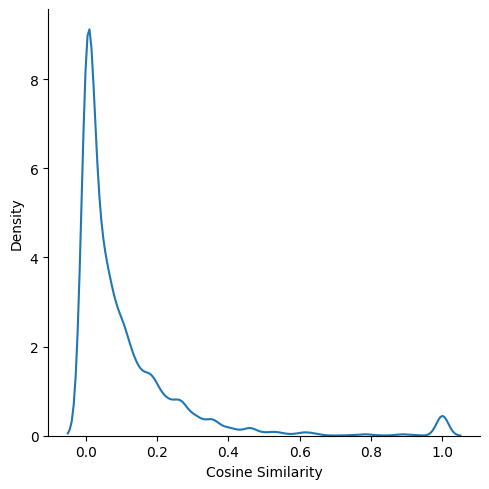

In [46]:
sns.displot(same_peptide_cosine_scores, x="Cosine Similarity", kind="kde")

In [49]:
same_peptide_cosine_scores['Cosine Similarity'].describe()

count    113047.000000
mean          0.109061
std           0.171961
min           0.000000
25%           0.007885
50%           0.048633
75%           0.136431
max           1.000000
Name: Cosine Similarity, dtype: float64

In [50]:
different_peptide_cosine_scores = []
cosine_score_matrix = cosine_similarity(np.array(different_intensities))
for row in range(len(cosine_score_matrix)) :
    for col in range(row + 1, len(cosine_score_matrix)) :
        different_peptide_cosine_scores.append(cosine_score_matrix[row, col])

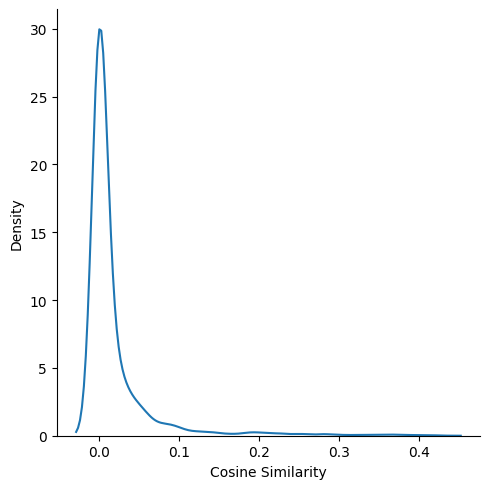

In [52]:
sns.displot(different_peptide_cosine_scores, x="Cosine Similarity", kind="kde")

In [53]:
different_peptide_cosine_scores['Cosine Similarity'].describe()

count    3655.000000
mean        0.019249
std         0.049013
min         0.000000
25%         0.000000
50%         0.000000
75%         0.015489
max         0.423782
Name: Cosine Similarity, dtype: float64

In [55]:
stats.ttest_ind(different_peptide_cosine_scores['Cosine Similarity'], same_peptide_cosine_scores['Cosine Similarity'], equal_var=False)

Ttest_indResult(statistic=-93.69481044830717, pvalue=0.0)

In [63]:
same_peptide_cosine_scores['Same/Different'] = 'Same'
different_peptide_cosine_scores['Same/Different'] = 'Different'

data = pd.concat([same_peptide_cosine_scores.sample(len(different_peptide_cosine_scores)), different_peptide_cosine_scores])

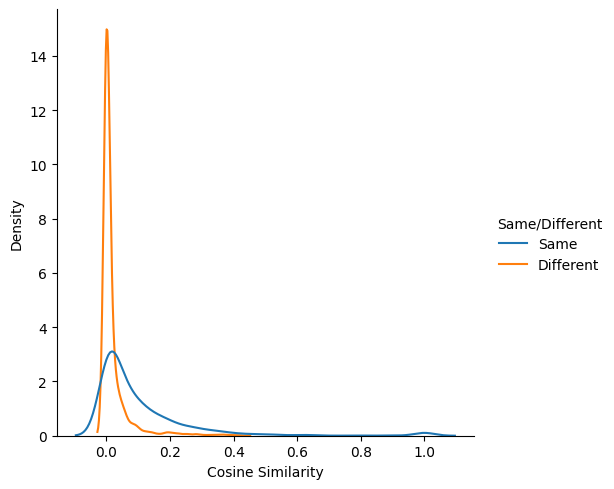

In [64]:
sns.displot(data, x="Cosine Similarity", kind="kde", hue='Same/Different')

In [ ]:
dfs = []
for scan in scans :
    intensity = np.zeros(len(unique_m_zs))
    scan.m_z = [float(i) for i in scan.m_z]
    scan.intensity = [float(i) for i in scan.intensity]
    indexes = np.where(np.isin(np.array(unique_m_zs), np.array(scan.m_z)))[0]
    intensity[indexes] = scan.intensity
    df = pd.DataFrame({scan.title: intensity}, index=unique_m_zs)
    dfs.append(df)
A = pd.concat(dfs, axis=1)

In [19]:
series1_alt_scan_intensity = np.zeros(len(unique_m_zs))
series1_alt_scan.m_z = bin_m_z(series1_alt_scan)
series1_alt_scan.m_z, series1_alt_scan.intensity = combine_duplicates(series1_alt_scan)
indexes = np.where(np.isin(np.array(unique_m_zs), np.array(series1_alt_scan.m_z)))[0]
series1_alt_scan_intensity[indexes] = series1_alt_scan.intensity

series1_scan_intensity = np.zeros(len(unique_m_zs))
series1_scans[0].m_z = bin_m_z(series1_scans[0])
series1_scans[0].m_z, series1_scans[0].intensity = combine_duplicates(series1_scans[0])
indexes = np.where(np.isin(np.array(unique_m_zs), np.array(series1_scans[0].m_z)))[0]
series1_scan_intensity[indexes] = series1_scans[0].intensity

In [139]:
series1_scan_intensity_fake = np.zeros(len(unique_m_zs))
avg_height = np.average(series1_scan_intensity[np.where(series1_scan_intensity > 0)[0]])
for i in range(len(series1_scan_intensity)) :
    if (series1_scan_intensity[i] == 0) & (np.random.randint(15000) == 0) :
        series1_scan_intensity_fake[i] = avg_height * (1 + np.random.normal())
    elif (series1_scan_intensity[i] > 0) & (np.random.uniform() > 0.17) :
        series1_scan_intensity_fake[i] = 0
    else :
        series1_scan_intensity_fake[i] = series1_scan_intensity[i] * (1 + np.random.normal())

In [140]:
sum(series1_scan_intensity_fake > 0)

41

In [141]:
cosine_similarity(np.array([list(series1_scan_intensity_fake), list(series1_scan_intensity)]))[0,1]

0.09353254197196553

In [123]:
def get_cosine_similarity(array1, array2) :
    return cosine_similarity(np.array([list(array1), list(array2)]))[0,1]

In [142]:
series1_alt_scan_intensity = np.zeros(len(unique_m_zs))
series1_alt_scan.m_z = bin_m_z(series1_alt_scan)
series1_alt_scan.m_z, series1_alt_scan.intensity = combine_duplicates(series1_alt_scan)
indexes = np.where(np.isin(np.array(unique_m_zs), np.array(series1_alt_scan.m_z)))[0]
series1_alt_scan_intensity[indexes] = series1_alt_scan.intensity

correct_scores = []
correct_coefficients = []
one_wrong_scores = []
one_wrong_coefficients = []
bad_scores = []
bad_coefficients = []

correct_cosine_similarities = []
one_wrong_cosine_similarities = []
two_wrong_cosine_similarities = []

i = 0
for chimeric_index, scan in file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), ['Chimeric Index', 'Scan']].values :
    chimeric_scan = chimeric_scans[chimeric_index]
    chimeric_scan.m_z = bin_m_z(chimeric_scan)
    chimeric_scan.m_z, chimeric_scan.intensity = combine_duplicates(chimeric_scan)
    chimeric_intensity = np.zeros(len(unique_m_zs))
    chimeric_indexes = np.where(np.isin(np.array(unique_m_zs), np.array(chimeric_scan.m_z)))[0] # potential problem, what if chimeric spectra 
                                                                              # has m_z values that didn't occur in the original spectra? 
    chimeric_intensity[chimeric_indexes] = chimeric_scan.intensity

    file1_intensity = np.zeros(len(unique_m_zs))
    scan.m_z = bin_m_z(scan)
    scan.m_z, scan.intensity = combine_duplicates(scan)
    file1_indexes = np.where(np.isin(np.array(unique_m_zs), np.array(scan.m_z)))[0]
    file1_intensity[file1_indexes] = scan.intensity

    ###################################
    # for m_z in chimeric_scan.m_z :
    #     if m_z in scan.m_z :
    #         scan.intensity[scan.m_z.index(m_z)] = chimeric_scan.intensity[chimeric_scan.m_z.index(m_z)]
    #     if m_z in series1_alt_scan.m_z :
    #         series1_alt_scan.intensity[series1_alt_scan.m_z.index(m_z)] = chimeric_scan.intensity[chimeric_scan.m_z.index(m_z)]
    
    # series1_alt_scan_intensity[indexes] = series1_alt_scan.intensity
    # file1_intensity[file1_indexes] = scan.intensity
    ####################################

    A = pd.DataFrame({series1_scans[0].title: series1_scan_intensity_fake,
                      scan.title: file1_intensity}, index=unique_m_zs)
    b = chimeric_intensity
    model = LinearRegression(fit_intercept=False, positive=True)
    model.fit(A, b)
    correct_scores.append(np.linalg.norm(model.predict(A)-b))
    correct_coefficients.append(model.coef_)
    correct_cosine_similarities.append(get_cosine_similarity(chimeric_intensity, series1_scan_intensity_fake + file1_intensity))

    if i >= 1 :
        A = pd.DataFrame({'one_ago': one_ago, 
                          'current':file1_intensity}, index=unique_m_zs)
        b = np.array(chimeric_intensity)
        model = LinearRegression(fit_intercept=False, positive=True)
        model.fit(A, b)
        one_wrong_scores.append(np.linalg.norm(model.predict(A)-b))
        one_wrong_coefficients.append(model.coef_)
        one_wrong_cosine_similarities.append(get_cosine_similarity(chimeric_intensity, one_ago + file1_intensity))

    if i >= 2 :
        A = pd.DataFrame({'one_ago': one_ago,
                          'two_ago': two_ago}, index=unique_m_zs)
        b = np.array(chimeric_intensity)
        model = LinearRegression(fit_intercept=False, positive=True)
        model.fit(A, b)
        bad_scores.append(np.linalg.norm(model.predict(A)-b))
        bad_coefficients.append(model.coef_)
        two_wrong_cosine_similarities.append(get_cosine_similarity(chimeric_intensity, one_ago + two_ago))


    if i >= 1 :
        two_ago = one_ago
    one_ago = file1_intensity

    i += 1

    if i % 100 == 0 : 
        print(i/len(file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), 'Scan']))

0.014302059496567507
0.028604118993135013
0.04290617848970252
0.057208237986270026
0.07151029748283753
0.08581235697940504
0.10011441647597254
0.11441647597254005
0.12871853546910755
0.14302059496567507
0.15732265446224256
0.17162471395881007
0.1859267734553776
0.20022883295194507
0.2145308924485126
0.2288329519450801
0.2431350114416476
0.2574370709382151
0.2717391304347826
0.28604118993135014
0.3003432494279176
0.3146453089244851
0.32894736842105265
0.34324942791762014
0.35755148741418763
0.3718535469107552
0.38615560640732266
0.40045766590389015
0.4147597254004577
0.4290617848970252
0.44336384439359267
0.4576659038901602


KeyboardInterrupt: 

In [155]:
master = pd.DataFrame({'Correct Residual': correct_scores[:3215],
                       'Correct Cosine Similarity': correct_cosine_similarities[:3215],
                       'OW Residual': one_wrong_scores[:3215],
                       'OW Cosine': one_wrong_cosine_similarities[:3215],
                       'TW Residaul': bad_scores,
                       'TW Cosine': two_wrong_cosine_similarities})

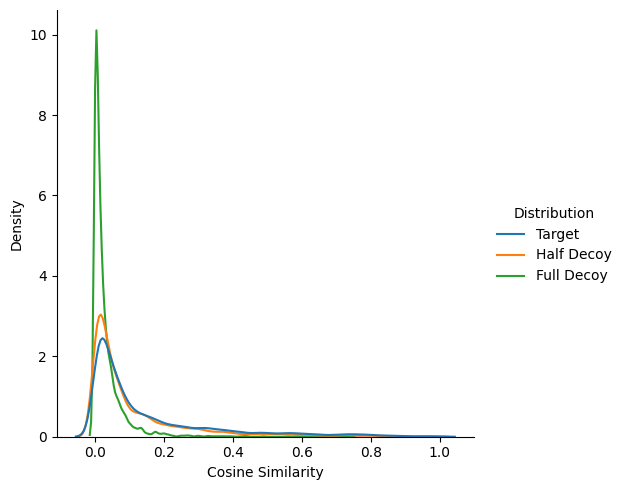

In [168]:
correct = pd.DataFrame({'Cosine Similarity': correct_cosine_similarities})
ow = pd.DataFrame({'Cosine Similarity': one_wrong_cosine_similarities})
tw = pd.DataFrame({'Cosine Similarity': two_wrong_cosine_similarities})

correct['Distribution'] = 'Target'
ow['Distribution'] = 'Half Decoy'
tw['Distribution'] = 'Full Decoy'

data = pd.concat([correct, ow, tw])

sns.displot(data, x="Cosine Similarity", kind="kde", hue='Distribution', bw_adjust=0.5)

In [171]:
corr_coefficients = [l[i] for i in range(2) for l in correct_coefficients]
one_wrong_coefficients = [l[i] for i in range(2) for l in one_wrong_coefficients]
bad_coefficients = [l[i] for i in range(2) for l in bad_coefficients]

In [173]:
c_sum_coef = [corr_coefficients[i] + corr_coefficients[i+1] for i in range(0,len(corr_coefficients), 2)]
ow_sum_coef = [one_wrong_coefficients[i] + one_wrong_coefficients[i+1] for i in range(0, len(one_wrong_coefficients), 2)]
tw_sum_coef = [bad_coefficients[i] + bad_coefficients[i+1] for i in range(0, len(bad_coefficients), 2)]

(-0.3, 1.5)

<Figure size 640x480 with 0 Axes>

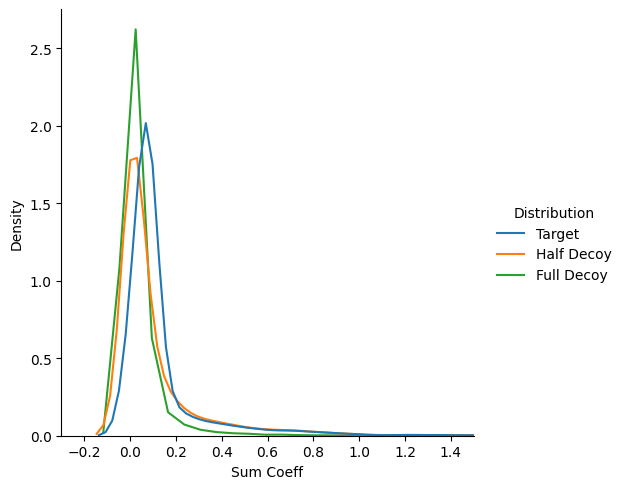

In [180]:
c = pd.DataFrame({'Sum Coeff': corr_coefficients})
o = pd.DataFrame({'Sum Coeff': one_wrong_coefficients})
t = pd.DataFrame({'Sum Coeff': bad_coefficients})

c['Distribution'] = 'Target'
o['Distribution'] = 'Half Decoy'
t['Distribution'] = 'Full Decoy'

data = pd.concat([c, o, t])

plt.clf()
sns.displot(data, x="Sum Coeff", kind="kde", hue='Distribution')
plt.xlim(-.3, 1.5)

In [183]:
sum_coeff = pd.DataFrame({'Target Coeff Sum': c_sum_coef[:len(tw_sum_coef)],
                          'Half Decoy Coeff Sum': ow_sum_coef[:len(tw_sum_coef)],
                          'Full Decoy Coeff Sum': tw_sum_coef})

In [185]:
stats.ttest_ind(c_sum_coef, ow_sum_coef)

Ttest_indResult(statistic=4.690764024577512, pvalue=2.7781230595321764e-06)

In [186]:
stats.ttest_ind(ow_sum_coef, tw_sum_coef)

Ttest_indResult(statistic=15.536461272123683, pvalue=1.8258712711745468e-53)

In [184]:
sum_coeff.describe()

,Target Coeff Sum,Half Decoy Coeff Sum,Full Decoy Coeff Sum
count,3215.000000,3215.000000,3215.000000
mean,0.275049,0.228635,0.085876
std,0.380027,0.412439,0.319171
min,0.000000,0.000000,0.000000
25%,0.155507,0.018365,0.007124
50%,0.155507,0.076065,0.028206
75%,0.228555,0.261938,0.081455
max,5.586495,5.585948,13.836475


In [169]:
correct_coefficients

[array([0.07775328, 0.26701122]),
 array([0.07775328, 0.0146772 ]),
 array([0.07775328, 0.1278801 ]),
 array([0.07775328, 0.00064681]),
 array([0.07775328, 0.00188846]),
 array([0.07775328, 0.        ]),
 array([0.07775328, 0.09371569]),
 array([0.07775328, 0.05884897]),
 array([0.07775328, 0.11736706]),
 array([0.07775328, 3.63985288]),
 array([0.07775328, 0.        ]),
 array([0.07775328, 0.01778884]),
 array([0.07775328, 0.35588858]),
 array([0.07775328, 0.06219178]),
 array([0.07775328, 0.        ]),
 array([0.07775328, 0.20122591]),
 array([0.07775328, 0.12713871]),
 array([0.07775328, 0.04019345]),
 array([0.07775328, 0.02774822]),
 array([0.07775328, 0.00100847]),
 array([0.07775328, 0.01256007]),
 array([0.07775328, 0.19684404]),
 array([0.07775328, 0.13554539]),
 array([0.07775328, 0.67068669]),
 array([0.07775328, 0.02310166]),
 array([0.07775328, 0.        ]),
 array([0.07775328, 0.07714273]),
 array([0.07775328, 0.18146222]),
 array([0.07775328, 0.19293281]),
 array([0.0777

In [156]:
master.describe()

,Correct Residual,Correct Cosine Similarity,OW Residual,OW Cosine,TW Residaul,TW Cosine
count,3.215000e+03,3215.000000,3.215000e+03,3215.000000,3.215000e+03,3215.000000
mean,7.594160e+04,0.144557,7.589604e+04,0.113244,7.945079e+04,0.030250
std,1.612852e+05,0.185349,1.611996e+05,0.158650,1.649510e+05,0.050118
min,8.840461e+03,0.000040,8.869601e+03,0.000000,8.869975e+03,0.000000
25%,2.175703e+04,0.023154,2.174334e+04,0.016098,2.227104e+04,0.004023
50%,3.597580e+04,0.066184,3.598297e+04,0.049658,3.701014e+04,0.014188
75%,6.936041e+04,0.187080,6.936177e+04,0.141516,7.291358e+04,0.037006
max,3.471636e+06,0.988738,3.471636e+06,0.976971,3.476174e+06,0.739085


In [160]:
stats.ttest_ind(correct_cosine_similarities, one_wrong_cosine_similarities)

Ttest_indResult(statistic=7.3186875864260665, pvalue=2.8093390550471873e-13)

In [161]:
stats.ttest_ind(correct_cosine_similarities, two_wrong_cosine_similarities)

Ttest_indResult(statistic=33.752251375917304, pvalue=4.555964508358174e-230)

In [162]:
stats.ttest_ind(one_wrong_cosine_similarities, two_wrong_cosine_similarities)

Ttest_indResult(statistic=28.2773599453198, pvalue=6.621882371574008e-166)

In [131]:
np.average(two_wrong_cosine_similarities)

0.0012196019100615652

In [127]:
np.average(one_wrong_cosine_similarities)

0.0847278071968053

In [126]:
np.average(correct_cosine_similarities)

0.12193742119995898

In [51]:
scan = file1_scans[chimeric_index]
f1_intense = np.zeros(len(unique_m_zs))
scan.m_z = bin_m_z(scan)
scan.m_z, scan.intensity = combine_duplicates(scan)
file1_indexes = np.where(np.isin(np.array(unique_m_zs), np.array(scan.m_z)))[0]
f1_intense[file1_indexes] = scan.intensity

s1scan = series1_scans[0]
series1_intense = np.zeros(len(unique_m_zs))
s1scan.m_z = bin_m_z(s1scan)
s1scan.m_z, scan.intensity = combine_duplicates(s1scan)
s1_indexes = np.where(np.isin(np.array(unique_m_zs), np.array(s1scan.m_z)))[0]
series1_intense[s1_indexes] = s1scan.intensity

<BarContainer object of 7863 artists>

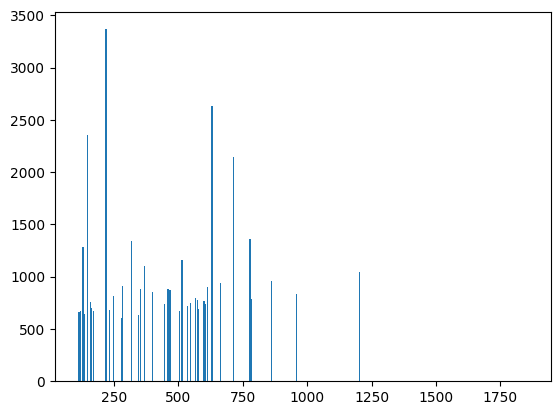

In [63]:
plt.bar(unique_m_zs, series1_intense, width=5)

<BarContainer object of 7863 artists>

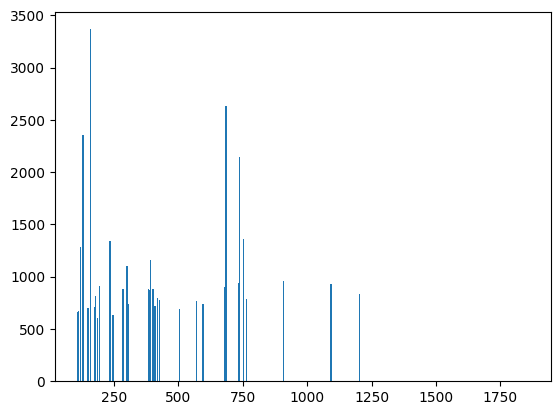

In [54]:
plt.bar(unique_m_zs, f1_intense, width=5)

In [60]:
file1_indexes

array([   7,  278,  372,  528,  720,  730,  765,  786,  828, 1140, 1174,
       1185, 1203, 1399, 1421, 1465, 1581, 1730, 1979, 2047, 2172, 2367,
       2383, 2869, 2959, 3073, 3171, 3589, 3733, 4185, 4194, 4272, 4288,
       4290, 4292, 4388, 4392, 4638, 4640, 4648, 4665, 4856, 5096, 5255,
       5434, 5467, 5468, 5530, 5812, 5847, 5850, 6142, 6426, 6455, 6507,
       6749, 6774, 6783, 6788, 6795, 6984, 7520, 7716, 7739], dtype=int64)

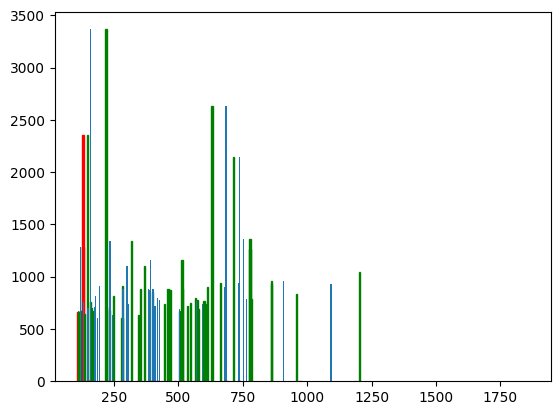

In [62]:
barlist = plt.bar(unique_m_zs, f1_intense + series1_intense, width=5)
for i in file1_indexes :
    barlist[i].set_color('r')
for j in s1_indexes :
    barlist[j].set_color('g')
plt.show()

In [39]:
correct_coefficients

[array([0.        , 0.25581225])]

In [40]:
correct_scores

[14499.31134560533]

In [32]:
correct_scores

[14499.31134560533,
 14793.868855931443,
 12786.170364567673,
 14773.629545805106,
 13699.60283753711,
 14354.365173925009,
 13756.91426178255,
 30454.977771303384,
 30838.777040248857,
 30868.320768946436]

In [31]:
correct_coefficients

[array([0.        , 0.25581225]),
 array([0.        , 0.01973826]),
 array([0.        , 0.58130567]),
 array([0.       , 0.0687121]),
 array([0.        , 0.40297468]),
 array([0.        , 0.29861285]),
 array([0.        , 0.38887571]),
 array([0.        , 0.13108385]),
 array([0.        , 0.31922022]),
 array([0.        , 0.00103035])]

In [81]:
correct_coefficients = [arr[i] for i in range(2) for arr in correct_coefficients]

In [76]:
stats.ttest_ind(correct_scores, bad_scores)

Ttest_indResult(statistic=-0.6742973679743453, pvalue=0.5097481673863057)

In [83]:
stats.ttest_ind(correct_coefficients, bad_coefficients)

Ttest_indResult(statistic=1.5192798337240683, pvalue=0.13793748938654712)

In [82]:
bad_coefficients = [arr[i] for i in range(2) for arr in bad_coefficients]

In [70]:
series1_scan = series1_scans[0]
series1_scan_intensity = np.zeros(len(unique_m_zs))
series1_scan.m_z = [float(i) for i in series1_scan.m_z]
series1_scan.intensity = [float(i) for i in series1_scan.intensity]
indexes = np.where(np.isin(np.array(unique_m_zs), np.array(series1_scan.m_z)))[0]
series1_scan_intensity[indexes] = series1_scan.intensity

correct_scores = []
correct_coefficients = []
one_wrong_scores = []
one_wrong_coefficients = []
bad_scores = []
bad_coefficients = []

i = 0
for chimeric_index, scan in enumerate(file1_scans) :
    chimeric_scan = chimeric_scans[chimeric_index]
    chimeric_scan.m_z, chimeric_scan.intensity = combine_duplicates(chimeric_scan)
    chimeric_intensity = np.zeros(len(unique_m_zs))
    indexes = np.where(np.isin(np.array(unique_m_zs), np.array(chimeric_scan.m_z)))[0] # potential problem, what if chimeric spectra 
                                                                              # has m_z values that didn't occur in the original spectra? 
    chimeric_intensity[indexes] = chimeric_scan.intensity

    file1_intensity = np.zeros(len(unique_m_zs))
    scan.m_z = [float(i) for i in scan.m_z]
    scan.intensity = [float(i) for i in scan.intensity]
    indexes = np.where(np.isin(np.array(unique_m_zs), np.array(scan.m_z)))[0]
    file1_intensity[indexes] = scan.intensity

    A = pd.DataFrame({series1_alt_scan.title: series1_scan_intensity,
                      scan.title: file1_intensity}, index=unique_m_zs)
    b = np.array(chimeric_intensity)
    model = LinearRegression(fit_intercept=False, positive=True)
    model.fit(A, b)
    correct_scores.append(np.linalg.norm(model.predict(A)-b))
    correct_coefficients.append(model.coef_)

    if i >= 1 :
        A = pd.DataFrame({'one_ago': one_ago, 
                          'current':series1_scan_intensity}, index=unique_m_zs)
        b = np.array(chimeric_intensity)
        model = LinearRegression(fit_intercept=False, positive=True)
        model.fit(A, b)
        one_wrong_scores.append(np.linalg.norm(model.predict(A)-b))
        one_wrong_coefficients.append(model.coef_)

    if i >= 2 :
        A = pd.DataFrame({'one_ago': one_ago,
                          'two_ago': two_ago}, index=unique_m_zs)
        b = np.array(chimeric_intensity)
        model = LinearRegression(fit_intercept=False, positive=True)
        model.fit(A, b)
        bad_scores.append(np.linalg.norm(model.predict(A)-b))
        bad_coefficients.append(model.coef_)


    if i >= 1 :
        two_ago = one_ago
    one_ago = file1_intensity

    i += 1

    if i % 10 == 0 : 
        print(i/len(file1_alt_scans_info.loc[pd.notnull(file1_alt_scans_info['Scan']), 'Scan']))
        break

0.0014302059496567505


In [63]:
correct_coefficients

[array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.])]

In [71]:
one_wrong_coefficients

[array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.]),
 array([0., 1.])]

In [65]:
bad_coefficients

[array([0., 0.]),
 array([0., 0.]),
 array([0., 0.]),
 array([0., 0.]),
 array([0., 0.]),
 array([0., 0.]),
 array([0., 0.]),
 array([0., 0.])]

In [67]:
correct_scores

[6.561468513030565e-10,
 1.6900763452347867e-12,
 1.6900763452347867e-12,
 4.0065538511739974e-12,
 3.15672954841712e-12,
 2.893994419845934e-12,
 1.6900763452347867e-12,
 1.6900763452347867e-12,
 2.3656698484370296e-12,
 1.6572172098571638e-11]

In [72]:
one_wrong_scores

[3754.03463933073,
 9539.947759648798,
 8660.006969899163,
 5829.529883677667,
 12151.436579287227,
 261421.56382426506,
 7379.988665500161,
 8495.963148206692,
 35198.86458342183]

In [73]:
bad_scores

[12247.490341327111,
 11575.238102206573,
 9642.294077073344,
 14375.250514148001,
 261534.36571266953,
 10651.509240806374,
 11453.026072604518,
 36027.0798756455]

<Axes: ylabel='Count'>

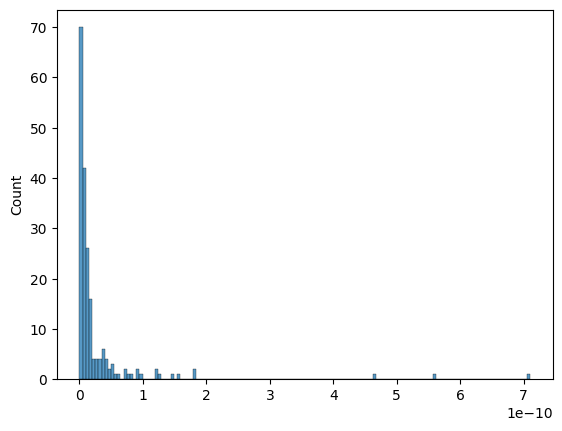

In [43]:
sns.histplot(correct_scores)

<Axes: ylabel='Count'>

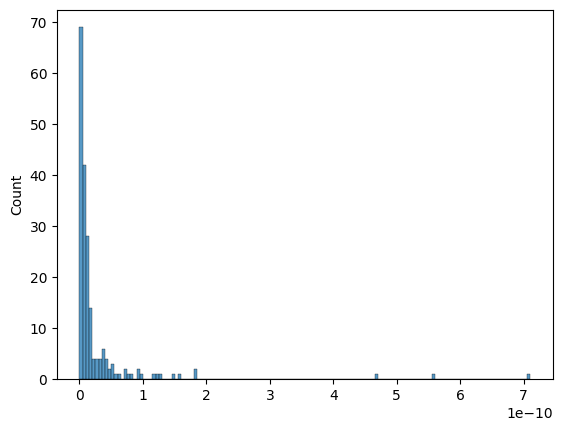

In [44]:
sns.histplot(one_wrong_scores)

In [52]:
np.amin(bad_scores)

7404.448454312593

<Axes: ylabel='Count'>

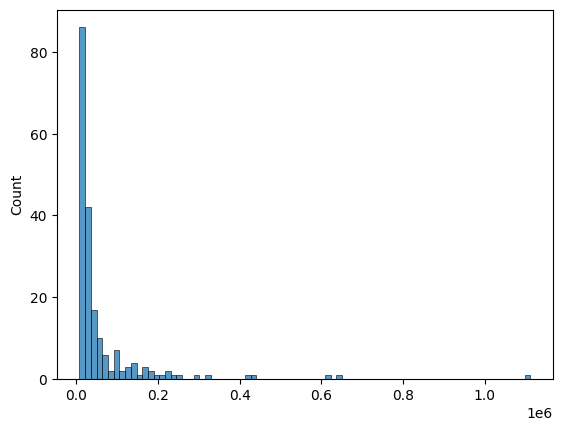

In [49]:
sns.histplot(bad_scores)

<Axes: ylabel='Count'>

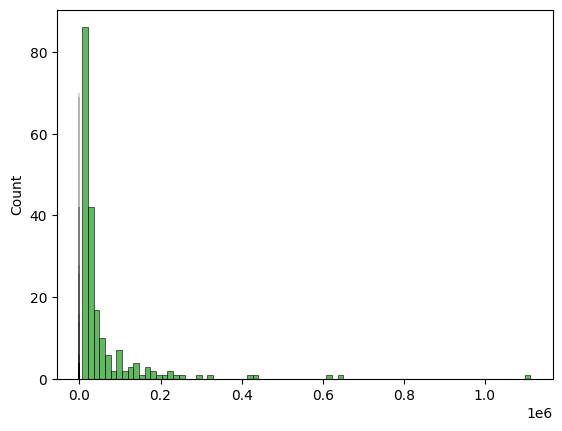

In [42]:
target = pd.DataFrame({'score': correct_scores, 'target_decoy': 'target'})
one_right = pd.DataFrame({'score': one_wrong_scores, 'target_decoy': 'one wrong'})
decoy = pd.DataFrame({'score':bad_scores, 'target_decoy': 'decoy'})
scores = pd.concat([target, one_right, decoy], ignore_index=True, axis=0)





In [ ]:
b = chimeric_spectra[0]
x, residual = nnls(A, b)
print(x)
print(residual)

model = LinearRegression(fit_intercept=False, positive=True)
model.fit(A, b)
print('NNLS coef', model.coef_)
print('NNLS residual', np.linalg.norm(model.predict(A)-b))


x = np.linalg.pinv(A) @ b
residual = np.linalg.norm((A@x) - b)
print(x)
print(residual)